In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
zip_file_path = '/content/drive/MyDrive/Datasets/Food_item_detection.zip'

In [ ]:
from PIL import Image
import zipfile
import io
import os
import tempfile

X = []
y = []


# Create a temporary directory to extract the contents of the ZIP file
with tempfile.TemporaryDirectory() as temp_dir:
    with zipfile.ZipFile(zip_file_path, 'r') as zip_file:
        zip_file.extractall(temp_dir)

    # List all files in the temporary directory
    for root, dirs, files in os.walk(temp_dir):
        for file_name in files:
            # Extract class name from the folder name
            class_name = os.path.basename(root)

            # Construct the image file path
            image_path = os.path.join(root, file_name)

            # Open and process each image using Pillow (PIL)
            with Image.open(image_path) as img:
                img = img.resize((224,224))
                img = img.convert("RGB")
                img_array = np.array(img)

            X.append(img_array)
            y.append(class_name)

# Now you have X (list of images) and y (list of corresponding class labels)


In [ ]:
len(y)

3115

In [ ]:
y[:10]

['pineapple',
 'pineapple',
 'pineapple',
 'pineapple',
 'pineapple',
 'pineapple',
 'pineapple',
 'pineapple',
 'pineapple',
 'pineapple']

In [ ]:
type(X)

list

In [ ]:
len(X)

3115

In [ ]:
rand=np.random.randint(0,len(X),12)

In [ ]:
rand

array([1631, 2511, 1447,  915, 1027,  872, 1154,  970,  819,  980, 2061,
       1549])

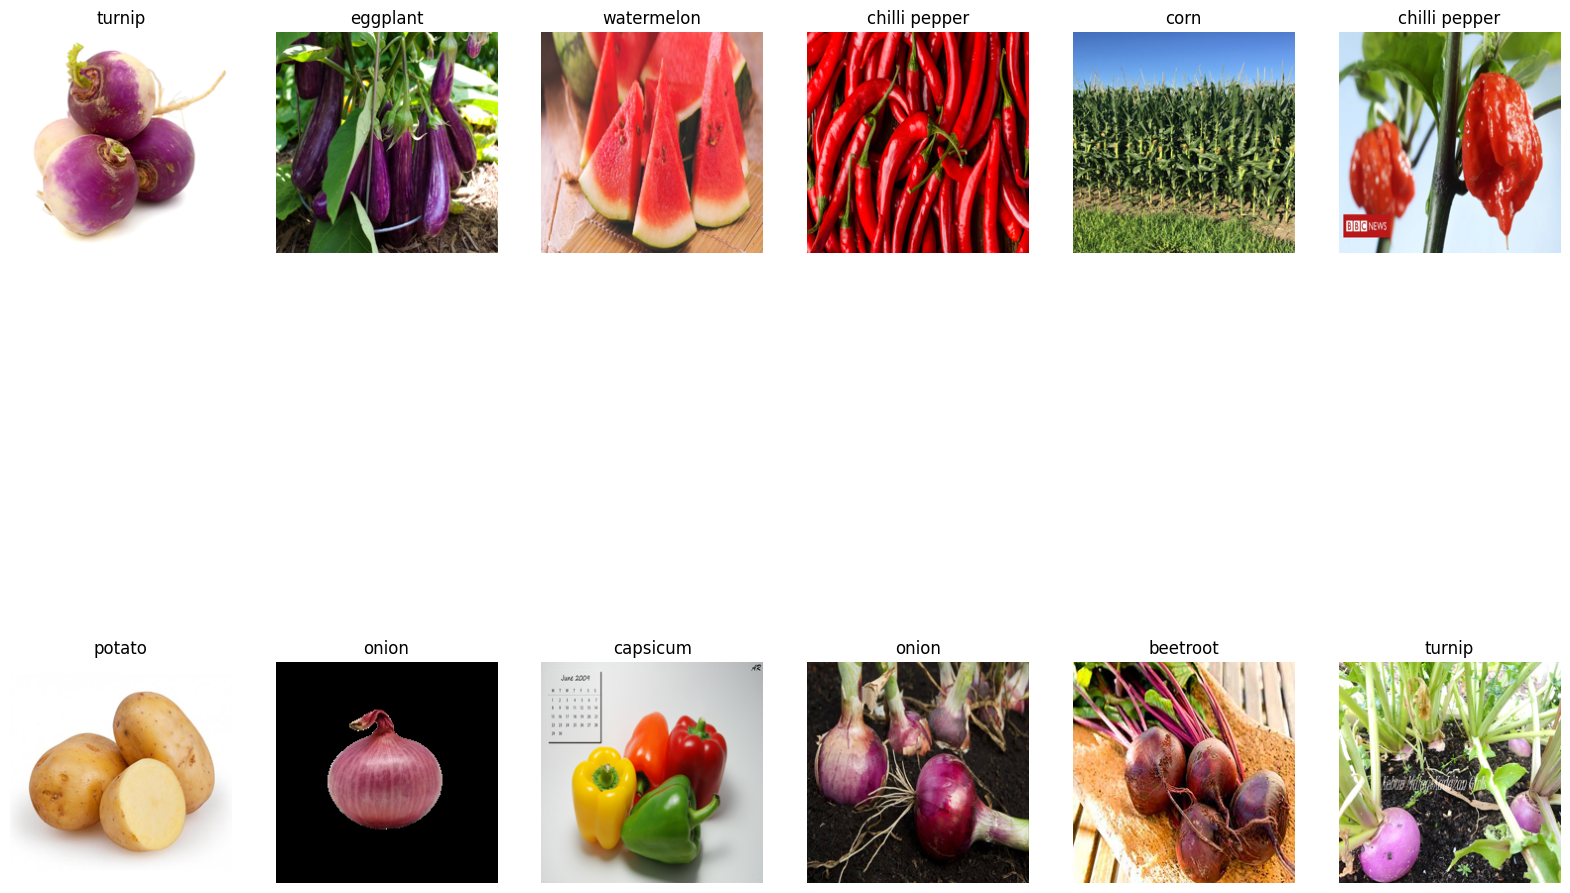

In [ ]:
plt.figure(figsize=(20, 15))
for i,j in enumerate(rand):
  plt.subplot(2,len(rand)//2,i+1)
  plt.imshow(X[j])
  plt.title('{}'.format(y[j]))
  plt.axis('off')

plt.show()

In [ ]:
y1=pd.DataFrame(y, columns=['Class'])

In [ ]:
print(y1)

          Class
0     pineapple
1     pineapple
2     pineapple
3     pineapple
4     pineapple
...         ...
3110  sweetcorn
3111  sweetcorn
3112  sweetcorn
3113  sweetcorn
3114  sweetcorn

[3115 rows x 1 columns]


In [ ]:
y1['Class'].value_counts()

grapes           100
peas             100
pineapple         99
turnip            98
soy beans         97
lettuce           97
spinach           97
cucumber          94
onion             94
cabbage           92
garlic            92
tomato            92
sweetcorn         91
bell pepper       90
pear              89
capsicum          89
jalepeno          88
kiwi              88
beetroot          88
corn              87
chilli pepper     87
mango             86
watermelon        84
eggplant          84
paprika           83
lemon             82
carrot            82
raddish           81
pomegranate       79
cauliflower       79
potato            77
banana            75
orange            69
sweetpotato       69
ginger            68
apple             68
Name: Class, dtype: int64

In [ ]:
y1['Class'].unique()

array(['pineapple', 'lemon', 'orange', 'grapes', 'banana', 'paprika',
       'raddish', 'sweetpotato', 'cabbage', 'capsicum', 'chilli pepper',
       'onion', 'corn', 'potato', 'soy beans', 'jalepeno', 'watermelon',
       'kiwi', 'turnip', 'lettuce', 'cauliflower', 'pear', 'tomato',
       'beetroot', 'spinach', 'garlic', 'peas', 'cucumber', 'eggplant',
       'pomegranate', 'carrot', 'ginger', 'mango', 'apple', 'bell pepper',
       'sweetcorn'], dtype=object)

In [ ]:
y1['Class'].nunique()

36

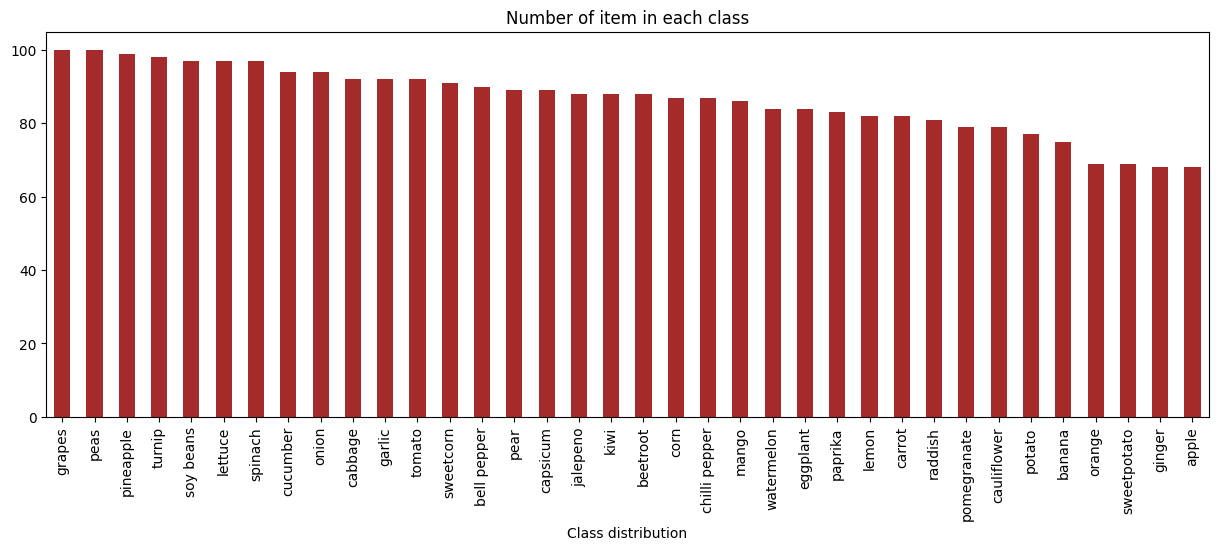

In [ ]:
plt.figure(figsize=(15,5))
y1['Class'].value_counts().plot(kind='bar', color='brown')
plt.xlabel('Class distribution')
plt.title('Number of item in each class')
plt.show()

In [ ]:
X=np.array(X)
X=X.astype('float32')/255

In [ ]:
X.shape

(3115, 224, 224, 3)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=2)
print(len(X_train))
print(len(X_val))

2492
623


In [ ]:
y_train = pd.get_dummies(y_train).values
y_val = pd.get_dummies(y_val).values

In [ ]:
y_train[:6]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=uint8)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Convolution2D, Dropout, Dense, Flatten, BatchNormalization, MaxPooling2D

In [ ]:
import tensorflow
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.models import Model

base_model = VGG19(input_shape=X_train[0].shape,
                   weights='imagenet',
                   include_top=False) #imports the VGG16 model and discards the last 1000 neuron layer.

x = base_model.output
x = GlobalAveragePooling2D()(x) # Optional
x = Dense(1024, activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
#x = Dropout(0.5)(x)
x = BatchNormalization()(x)
x = Dense(512, activation='relu')(x) #dense layer 2
x = Dense(512, activation='relu')(x) #dense layer 3
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
preds = Dense(36, activation='softmax')(x) #final layer with softmax activation

model_vgg19 = Model(inputs=base_model.input,
                    outputs=preds)

# set the first 20 layers of the network to be non-trainable
for layer in model_vgg19.layers[:20]:
    layer.trainable=False
for layer in model_vgg19.layers[20:]:
    layer.trainable=True

# Compile the model
model_vgg19.compile(optimizer=tensorflow.optimizers.Adam(learning_rate=1e-5), ## Modify Learning rate
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

model_vgg19.summary()

80134624/80134624 [==============================] - 1s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [ ]:
vgg19_history = model_vgg19.fit(x=X_train,y=y_train,batch_size=64,epochs=50,validation_data=(X_val, y_val))

Epoch 1/50
39/39 [==============================] - 53s 792ms/step - loss: 4.1899 - accuracy: 0.0329 - val_loss: 3.5797 - val_accuracy: 0.0385
Epoch 2/50
39/39 [==============================] - 15s 378ms/step - loss: 3.8077 - accuracy: 0.0586 - val_loss: 3.5810 - val_accuracy: 0.0305
Epoch 3/50
39/39 [==============================] - 17s 442ms/step - loss: 3.5182 - accuracy: 0.0983 - val_loss: 3.5813 - val_accuracy: 0.0305
Epoch 4/50
39/39 [==============================] - 15s 384ms/step - loss: 3.2327 - accuracy: 0.1509 - val_loss: 3.5714 - val_accuracy: 0.0369
Epoch 5/50
39/39 [==============================] - 17s 443ms/step - loss: 3.0138 - accuracy: 0.1858 - val_loss: 3.5450 - val_accuracy: 0.0433
Epoch 6/50
39/39 [==============================] - 17s 443ms/step - loss: 2.8318 - accuracy: 0.2432 - val_loss: 3.4882 - val_accuracy: 0.0578
Epoch 7/50
39/39 [==============================] - 15s 396ms/step - loss: 2.6558 - accuracy: 0.2905 - val_loss: 3.3944 - val_accuracy: 0.0947

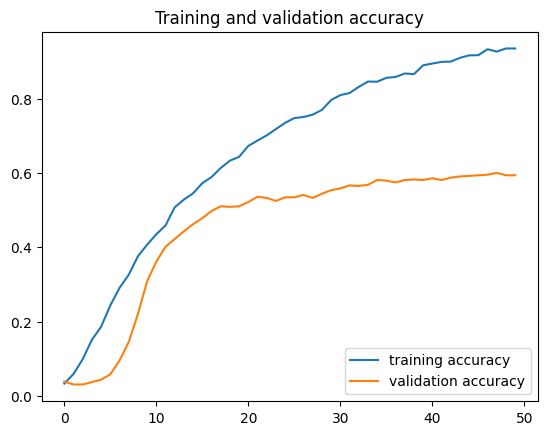

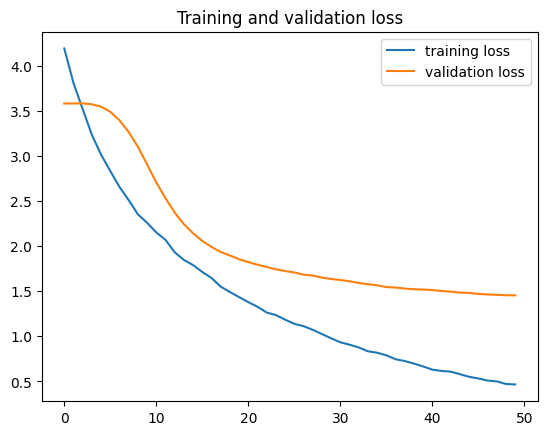

In [ ]:
## Accuracy and Loss plots

accuracy = vgg19_history.history['accuracy']
val_accuracy = vgg19_history.history['val_accuracy']
loss = vgg19_history.history['loss']
val_loss = vgg19_history.history['val_loss']

epochs = range(len(accuracy)) # Get number of epochs

plt.plot(epochs, accuracy, label = 'training accuracy')
plt.plot(epochs, val_accuracy, label = 'validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc = 'lower right')
plt.figure()

plt.plot(epochs, loss, label = 'training loss')
plt.plot(epochs, val_loss, label = 'validation loss')
plt.legend(loc = 'upper right')
plt.title('Training and validation loss')
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

base_model = VGG19(input_shape=X_train[0].shape,
                   weights='imagenet',
                   include_top=False)

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(1e-4))(x)
x = BatchNormalization()(x)
x = Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(1e-4))(x)
x = Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(1e-4))(x)
x = Dropout(0.4)(x)
x = BatchNormalization()(x)
preds = Dense(36, activation='softmax')(x)

model2_vgg19 = Model(inputs=base_model.input, outputs=preds)

for layer in model_vgg19.layers[:20]:
    layer.trainable = False
for layer in model_vgg19.layers[20:]:
    layer.trainable = True

# Learning Rate Scheduler
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

# Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Compile the model
model2_vgg19.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

model2_vgg19.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:

# Fit the model with data augmentation
history = model2_vgg19.fit(datagen.flow(X_train, y_train, batch_size=32),
                          validation_data=(X_val, y_val),
                          epochs=50)

Epoch 1/50
78/78 [==============================] - 87s 863ms/step - loss: 4.3561 - accuracy: 0.0365 - val_loss: 3.7570 - val_accuracy: 0.0241
Epoch 2/50
78/78 [==============================] - 49s 629ms/step - loss: 3.8897 - accuracy: 0.0803 - val_loss: 3.6775 - val_accuracy: 0.0337
Epoch 3/50
78/78 [==============================] - 49s 627ms/step - loss: 3.5024 - accuracy: 0.1477 - val_loss: 3.5029 - val_accuracy: 0.1108
Epoch 4/50
78/78 [==============================] - 52s 665ms/step - loss: 3.2014 - accuracy: 0.1986 - val_loss: 3.2022 - val_accuracy: 0.2697
Epoch 5/50
78/78 [==============================] - 52s 658ms/step - loss: 2.9356 - accuracy: 0.2596 - val_loss: 2.7905 - val_accuracy: 0.3387
Epoch 6/50
78/78 [==============================] - 51s 654ms/step - loss: 2.7078 - accuracy: 0.3222 - val_loss: 2.3943 - val_accuracy: 0.4510
Epoch 7/50
78/78 [==============================] - 49s 631ms/step - loss: 2.4595 - accuracy: 0.3796 - val_loss: 2.0972 - val_accuracy: 0.4896

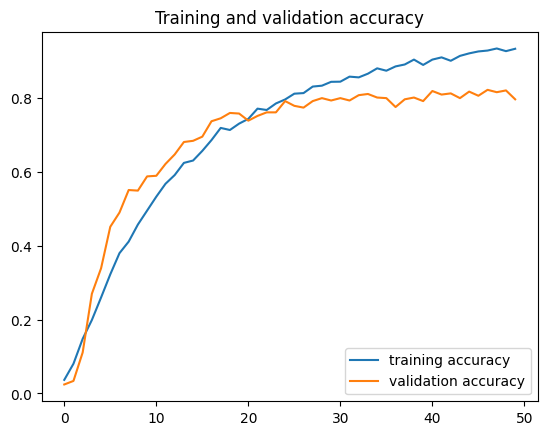

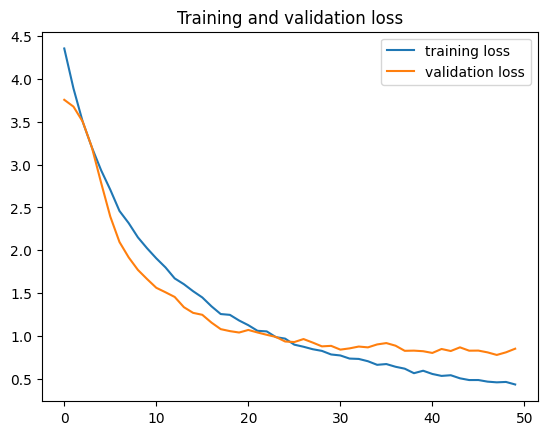

In [ ]:
## Accuracy and Loss plots

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy)) # Get number of epochs

plt.plot(epochs, accuracy, label = 'training accuracy')
plt.plot(epochs, val_accuracy, label = 'validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc = 'lower right')
plt.figure()

plt.plot(epochs, loss, label = 'training loss')
plt.plot(epochs, val_loss, label = 'validation loss')
plt.legend(loc = 'upper right')
plt.title('Training and validation loss')
plt.show()

From the above loss and accuracy plot it seems that the overfit reduces from the previous model.